# Data Incubator Proposal

## Challenge
2016 reported that 2.1 billion smartphone users in the world and this number is projected to grow to 3.3 billion by 2020(https://www.statista.com/statistics/330695/number-of-smartphone-users-worldwide/) ! With  massive,fast growing companies like Snapchat, Instagram, and Uber have their entire business operating on mobile, delivering the best mobile experience to their customers is important and effects hundreds of millions in revenue. 
<br>
As businesses and enterprises are being demanded to offer mobile applications and services, delivering a great mobile experience is expensive and challenging. 

## Proposal
``Social Media responses`` and ``mobile app reviews`` offer valuable data and insight into what their users are saying about businessed mobile app experience and features they like or dislike.

* However, large popular apps like Snapchat and Uber have over 500,000 reviews submitted and rising. 
* I propose collecting and analyze customer review data overtime as a way for mobile operated businesses, whether small or large, can analyze large volume customer feedback and quickly gain insight into improving their mobile app experience. 



* ### Data Sources: 
The various sources I will collect mobile app reviews
    * iTunes Search Api: scrapping and aggregating app reviews over time
    * [Coming Soon]Tweets to company's customer service
    * [Coming Soon] Google Play Developer API: Getting App Review from Google Play store 
* ### Analysis
Analysis I plan to do with mobile app reviews
    * I plan to explore not only ``predicting and analyzing sentiment`` of mobile app reviews, but also analyze what are the ``features/key terms`` that are associated with a positive or bad mobile experience. 
    * Understanding and quickly learning what features/experiences resulted in a bad review or rating will enable businesses and developers to quickly analyze and enhance their mobile experience better and faster.


## Signifigance
Mobile operated businesses like Snapchat and Uber, or even independent iOS developers can leverage sentiment analysis and keyterm extraction to understand what features their users like or dislike. For apps that are popular and have hundreds of thousands of reviews can quickly gain user sentiment over time and deliver great mobile experiences.

There are no available datasets aggregating mobile app reviews, so this enables a new oppurtunity for sentiment analysis and keyterm extraction to deliver insights to businesses. 
* Also with the iTunes Search api, we have the following abilities:
    * Can build a model to predict mobile app rating(1-5) based on customer review
    * Can compare sentiment of app reviews by different companies, (i.e. US vs UK)
    * Can track sentiment over app versions, get quick understanding if features from a certain update were "good" or "bad"
  

# Exploratory Analysis
* Here I aggregate and clean  Uber and Snapchat app reviews from the past week using the iTunes Search api.
* Note: I used Shazam app-review scraping repository to handle collecting iOS app reviews: (https://github.com/shazam/app-store-reviews-and-translations)
* I then compute and plot sentiment of Uber and Snapchat reviews overtime showcasing how we can get up-to-date and historical view of customer satisfaction. 

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import textacy
from pandas.io.json import json_normalize #package for flattening json in pandas df
%matplotlib inline

from datetime import datetime
from dateutil.parser import parse


/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


## Data Cleaning

In [410]:
# f = open("json/reviews-20180717.log")

In [132]:
# !ls json/

In [10]:
def parse_all_json_logs(path):
    js = []
    for log in os.listdir(path):
        print(os.path.join(path,log) )
        f = open(os.path.join(path,log))
        lines = f.readlines()
        print("Number of reviews: ",len(lines))
        f.close()
        reviews = [json.loads(i) for i in lines]
        js+=reviews
    return js

In [29]:
# js = f.readlines()
# f.close()

In [39]:
# uber_reviews = [json.loads(i) for i in js]

In [11]:
reviews = parse_all_json_logs('json')

# pd.DataFrame(reviews[0])
df = json_normalize(reviews[0])
for review in reviews[1:]:
    df = pd.concat([df,json_normalize(review)],axis=0)

json/reviews-20180722.log
Number of reviews:  144
json/reviews-20180723.log
Number of reviews:  7
json/reviews-20180721.log
Number of reviews:  163
json/reviews-20180720.log
Number of reviews:  157
json/reviews-20180718.log
Number of reviews:  119
json/reviews-20180719.log
Number of reviews:  171
json/reviews-20180717.log
Number of reviews:  53


In [12]:
uber_reviews = df[df["app_name"]=='Uber']
snapchat_reviews = df[df["app_name"]=='Snapchat']

In [ ]:
snapchat_reviews['rating']=snapchat_reviews['rating'].astype(int)

### Overview of iTunes Search Api:
* We have access to many details about a submitted app review
* here is all the attributes we can play with

In [20]:
snapchat_reviews[snapchat_reviews['rating']==1].iloc[0]

app_name                                               Snapchat
author                                  instagramstoriesrbetter
content       So although I still along w/ everyone else hat...
content_en    So although I still along w/ everyone else hat...
country                                                      US
id                                                   2949617676
rating                                                        1
store                                                    iTunes
t                                   22/Jul/2018:07:41:24 -07:00
title                                             Please fixxxx
title_en                                          Please fixxxx
version                                              10.36.0.23
voteCount                                                     0
voteSum                                                       0
Name: 0, dtype: object

In [13]:
snapchat_reviews[snapchat_reviews["rating"]<4].iloc[0]['content_en']

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


'Snap keeps glitching out when I try to take a picture I can‚Äôt send no pictures or videos without snap glitching out, please fix this issue'

In [420]:
# a = textacy.Doc(snapchat_reviews[snapchat_reviews["rating"]<4].iloc[1]['content_en'],lang='en')

In [421]:
# a.text

## Sentiment Test

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
### 1)     polarity: negative vs. positive    (-1.0 => +1.0)

In [40]:
from textblob import TextBlob
def compute_sentiment(text):
    '''
    Hackish way to determine sentiment
    '''
    opinion = TextBlob(text)
    if opinion.sentiment[0] < 0.0:
        return ('Neg',opinion.sentiment[0] )
    else:
        return ('Pos',opinion.sentiment[0] )
        

In [209]:
compute_sentiment(a.text)

('Neg', -0.05714285714285713)

## Calculate Sentiment overtime

In [244]:
#  m= {k:v for k,v in list(Months.items())}

In [299]:
# m

In [423]:
 Months = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04':'Apr', '05': 'May',\
                '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', \
                '10': 'Oct', '11': 'Nov', '12': 'Dec'}
month_name_to_num={v:k for k,v in Months.items()}
month_name_to_num

{'Jan': '01',
 'Feb': '02',
 'Mar': '03',
 'Apr': '04',
 'May': '05',
 'Jun': '06',
 'Jul': '07',
 'Aug': '08',
 'Sep': '09',
 'Oct': '10',
 'Nov': '11',
 'Dec': '12'}

In [425]:
def convert_month_name_to_num(string,d):
    for key in d.keys():
#         print(key)
        if string.find(key)>-1:
            return string.replace(key,d[key])
#     '22/Jul/2018:07:46:06 -07:00'.replace('Jul','06')

def rreplace(s, old, new, occurrence):
    li = s.rsplit(old, occurrence)
    return new.join(li)

def clean_date_strings(text,d):
    print(text)
    a = convert_month_name_to_num(text,d)
    a = rreplace(a,':','',1)
    print(a)
    return datetime.strptime(a,"%d/%m/%Y:%H:%M:%S %z")
    

In [426]:
# Test to make sure parsing works
clean_date_strings(snapchat_reviews[snapchat_reviews["rating"]<4].iloc[0]['t'],month_name_to_num)

22/Jul/2018:07:46:31 -07:00
22/07/2018:07:46:31 -0700


datetime.datetime(2018, 7, 22, 7, 46, 31, tzinfo=datetime.timezone(datetime.timedelta(-1, 61200)))

### Parse string datetime, and convert to python datetime

In [1]:
snapchat_reviews["t"]=snapchat_reviews["t"].apply(lambda x:clean_date_strings(x,month_name_to_num) ) #snapchat_reviews["rating"]

snapchat_reviews['t']=pd.to_datetime(snapchat_reviews['t'])

snapchat_reviews_by_time = snapchat_reviews.sort_values('t')

In [430]:
# sentiment = snapchat_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1]).as_matrix()
sentiment_df = snapchat_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1])
sentiment_df=pd.concat([snapchat_reviews_by_time['t'],sentiment_df],axis=1)
# time= snapchat_reviews_by_time['t'].as_matrix()

(array([736893.83333333, 736894.33333333, 736894.83333333, 736895.33333333,
        736895.83333333, 736896.33333333, 736896.83333333, 736897.33333333]),
 <a list of 8 Text xticklabel objects>)

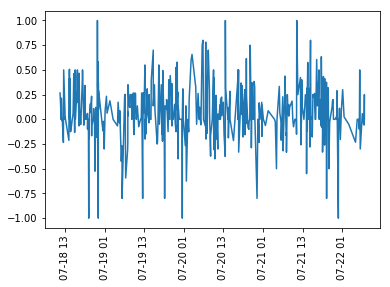

In [431]:
plt.plot(time,sentiment)
plt.xticks(rotation=90)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


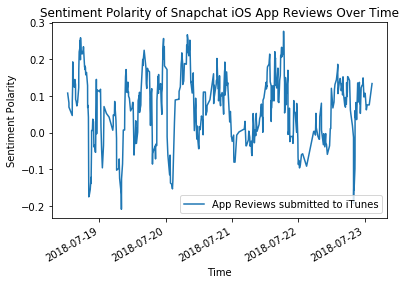

In [433]:
# 
sentiment_df=sentiment_df.set_index('t')
ax = pd.rolling_mean(sentiment_df,10).plot(title="Sentiment Polarity of Snapchat iOS App Reviews Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Polarity')
ax.legend(['App Reviews submitted to iTunes'])
plt.savefig('Sentiment Polarity of Snapchat iOS App Reviews Over Time') 

## Sentiment of Uber ios app reviews over time

In [2]:
uber_reviews["t"]=uber_reviews["t"].apply(lambda x:clean_date_strings(x,month_name_to_num) ) #snapchat_reviews["rating"]
uber_reviews['t']=pd.to_datetime(uber_reviews['t'])

uber_reviews_by_time = uber_reviews.sort_values('t')
# sentiment = uber_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1]).as_matrix()
uber_sentiment_df = uber_reviews_by_time['content_en'].apply(lambda x:compute_sentiment(x)[1])
uber_sentiment_df=pd.concat([uber_reviews_by_time['t'],uber_sentiment_df],axis=1)
uber_sentiment_df=uber_sentiment_df.set_index('t')
# time= snapchat_reviews_uber_reviews_by_timeby_time['t'].as_matrix()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  """Entry point for launching an IPython kernel.


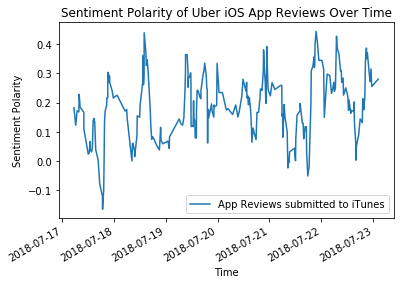

In [435]:
ax = pd.rolling_mean(uber_sentiment_df,10).plot(title="Sentiment Polarity of Uber iOS App Reviews Over Time")
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Polarity')
ax.legend(['App Reviews submitted to iTunes'])
plt.savefig('Sentiment Polarity of Uber iOS App Reviews Over Time.png') 

## Test of Emotional Valence and Keyterm extraction of mobile app reviews

With powerful frameworks like textacy, we can easily parse and analyze text to get even more understanding and sentiment about a customer review

Here we show how we can extract key terms of a 1 star review, and even analyze the emotion expressed in the review!

In [26]:
import textacy
from textacy.keyterms import textrank, sgrank
from textacy.lexicon_methods import emotional_valence

### Keyterm extraction

#### A sample of a 1-star rated review

In [22]:
one_star_review = textacy.Doc(snapchat_reviews[snapchat_reviews['rating']==1].iloc[0]['content_en'],lang='en')

In [24]:
one_star_review.text

'So although I still along w/ everyone else hate the newer updates , ive let it go Bc you guys obviously don‚Äôt value ‚Äúcustomer‚Äù satisfaction, HOWEVER can yalll pleaseeeee put back the ‚Äúclear all conversations‚Äù button back instead of having to manually!!!!! Delete them all which btw ( I spent 20 mins deleting all of them & 2 minutes later they came back) the way y‚Äôall have set up stories is already inconvenient & messy enough atleast let me clear my feed üôÑ it‚Äôs to the point where I get stressed out using the app & I love Snapchat but I‚Äôm really considering deleting it'

In [41]:
compute_sentiment(one_star_review.text)

('Neg', -0.05714285714285713)

#### Here we extract key terms from a document using the SGRank algorithm. 
* SGRank is an unsupervised automatic key term extraction

* [SGRank] Danesh, Sumner, and Martin. "SGRank: Combining Statistical and Graphical Methods to Improve the State of the Art in Unsupervised Keyphrase Extraction". Lexical and Computational Semantics (* SEM 2015) (2015): 117

In [42]:
sgrank(one_star_review)

[('messy enough atleast', 0.2457750792814893),
 ('yalll pleaseeeee', 0.2062540268798868),
 ('new update', 0.13421971144730405),
 ('button', 0.0352667030838702),
 ('conversation', 0.030908106605205092),
 ('satisfaction', 0.02865774639890465),
 ('inconvenient', 0.028319739373636573),
 ('clear', 0.027285562785679958),
 ('story', 0.026592806562270723),
 ('way', 0.026011585714015177)]

Here we see from the top phrases extracted, we can see app related features are mentioned such as
* new update
* button

### Emotional Analysis using Textacy NLP Library
* we can even do emotional analysis using textacy builtin functions. 
* We can use the emotional_valence function to get average emotional valence a review. The following emotions are computed ‚Äì AFRAID, AMUSED, ANGRY, ANNOYED, DONT_CARE, HAPPY, INSPIRED, SAD ‚Äì using the [DepecheMood] dataset.
["DepecheMood: a Lexicon for Emotion Analysis from Crowd-Annotated News". To appear in Proceedings of ACL 2014. ](#http://www.depechemood.eu/technology.html) 

* Note: Emotion analysis is not as reliable as sentiment as seen by example below, so need to investigate on how to apply emotion analysis robustly
<!--bibtex
@ARTICLE{2014arXiv1405.1605S,
   author = {{Staiano}, J. and {Guerini}, M.},
    title = "{DepecheMood: a Lexicon for Emotion Analysis from Crowd-Annotated News}",
  journal = {ArXiv e-prints},
archivePrefix = "arXiv",
   eprint = {1405.1605},
 primaryClass = "cs.CL",
 keywords = {Computer Science - Computation and Language, Computer Science - Computers and Society},
     year = 2014,
    month = may,
   adsurl = {http://adsabs.harvard.edu/abs/2014arXiv1405.1605S},
  adsnote = {Provided by the SAO/NASA Astrophysics Data System}
}
-->

In [43]:
res = emotional_valence(list(one_star_review.tokens),dm_data_dir="../../DepecheMood_V1.0/")

In [44]:
res

defaultdict(float,
            {'AFRAID': 0.10859367292307691,
             'AMUSED': 0.14160442284615385,
             'ANGRY': 0.11891582315384616,
             'ANNOYED': 0.12821893636538462,
             'DONT_CARE': 0.13039449813461537,
             'HAPPY': 0.12437881171153847,
             'INSPIRED': 0.13471745696153842,
             'SAD': 0.11317637769230766})

In [52]:
def get_strongest_emotion(emotional_valence):
#     emotional_valence.pop('AMUSED')
    l = list(res.items())
    return sorted(l,key=lambda x:x[1],reverse=True)[0]
def get_strongest_pos_neg_emotion(emotional_valence):
    '''
    Removing emotions not relevent in app reviews
    '''
    #'AFRAID': 0.10909253308333333,
    #'AMUSED': 0.1509716585833333,
    # 'INSPIRED': 0.13202246833333334,
    emotional_valence.pop('AFRAID')
    emotional_valence.pop('AMUSED')
    emotional_valence.pop('INSPIRED')
    l = list(res.items())
    return sorted(l,key=lambda x:x[1],reverse=True)[0]

    
    

In [53]:
get_strongest_emotion(res)

('INSPIRED', 0.13471745696153842)

<!--bibtex

@Article{PER-GRA:2007,
  Author    = {P\'erez, Fernando and Granger, Brian E.},
  Title     = {{IP}ython: a System for Interactive Scientific Computing},
  Journal   = {Computing in Science and Engineering},
  Volume    = {9},
  Number    = {3},
  Pages     = {21--29},
  month     = may,
  year      = 2007,
  url       = "http://ipython.org",
  ISSN      = "1521-9615",
  doi       = {10.1109/MCSE.2007.53},
  publisher = {IEEE Computer Society},
}

@article{Papa2007,
  author = {Papa, David A. and Markov, Igor L.},
  journal = {Approximation algorithms and metaheuristics},
  pages = {1--38},
  title = {{Hypergraph partitioning and clustering}},
  url = {http://www.podload.org/pubs/book/part\_survey.pdf},
  year = {2007}
}

-->